In [18]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
from math import pi
import scipy.stats
from datetime import datetime
  
df = pd.read_csv("./resultados_carga.jtl")

firstTimestamp = df.iloc[0]['timeStamp']
startupTime = (10*1000)
holdLoadTime = (120*1000)

startTime_1 = firstTimestamp + startupTime
endTime_1 = startTime_1 + holdLoadTime

startTime_2 = endTime_1 + startupTime
endTime_2 = startTime_2 + holdLoadTime

startTime_3 = endTime_2 + startupTime
endTime_3 = startTime_3 + holdLoadTime

startTime_4 = endTime_3 + startupTime
endTime_4 = startTime_4 + holdLoadTime

startTime_5 = endTime_4 + startupTime
endTime_5 = startTime_5 + holdLoadTime

startTime_6 = endTime_5 + startupTime
endTime_6 = startTime_6 + holdLoadTime


df_1 = df[(df['timeStamp']) > startTime_1]
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed'] < endTime_1)]
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed'] <= endTime_6)]
df_1_elapsed = df_1[df_1['responseCode'] == '200']['elapsed']
df_1_error = df_1[df_1['responseCode'] != '200']

df_2 = df[(df['timeStamp']) > startTime_2]
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed'] < endTime_2)]
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed'] <= endTime_6)]
df_2_elapsed = df_2[df_2['responseCode'] == '200']['elapsed']
df_2_error = df_2[df_2['responseCode'] != '200']

df_3 = df[(df['timeStamp']) > startTime_3]
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed'] < endTime_3)]
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed'] <= endTime_6)]
df_3_elapsed = df_3[df_3['responseCode'] == '200']['elapsed']
df_3_error = df_3[df_3['responseCode'] != '200']

df_4 = df[(df['timeStamp']) > startTime_4]
df_4 = df_4[(df_4['timeStamp'] + df_4['elapsed'] < endTime_4)]
df_4 = df_4[(df_4['timeStamp'] + df_4['elapsed'] <= endTime_6)]
df_4_elapsed = df_4[df_4['responseCode'] == '200']['elapsed']
df_4_error = df_4[df_4['responseCode'] != '200']

df_5 = df[(df['timeStamp']) > startTime_5]
df_5 = df_5[(df_5['timeStamp'] + df_5['elapsed'] < endTime_5)]
df_5 = df_5[(df_5['timeStamp'] + df_5['elapsed'] <= endTime_6)]
df_5_elapsed = df_5[df_5['responseCode'] == '200']['elapsed']
df_5_error = df_5[df_5['responseCode'] != '200']

df_6 = df[(df['timeStamp']) > startTime_6]
df_6 = df_6[(df_6['timeStamp'] + df_6['elapsed'] < endTime_6)]
df_6 = df_6[(df_6['timeStamp'] + df_6['elapsed'] <= endTime_6)]
df_6_elapsed = df_6[df_6['responseCode'] == '200']['elapsed']
df_6_error = df_6[df_6['responseCode'] != '200']


In [19]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [20]:
def getRow(data, hilos):
    minResponseTime = maxResponseTime = meanResponseTime = medianResponseTime = modeResponseTime = totalTime = std = rango = iqr = numRequest = throughput = potencia = confidence_interval = 0
    if (data.count() > 0):
        minResponseTime = data.min()
        maxResponseTime = data.max()
        meanResponseTime = data.mean()
        medianResponseTime = data.median()
        modeResponseTime = data.mode()
        totalTime = data.sum()

        std = data.std(ddof=0)

        rango = data.max() - data.min()
        iqr = data.quantile(0.75) - data.quantile(0.25)

        numRequest = data.size
        throughput = (numRequest/240)
        potencia = (throughput/meanResponseTime)
        confidence_interval = mean_confidence_interval(data)
    
    return [hilos, minResponseTime, maxResponseTime, meanResponseTime, medianResponseTime, std, numRequest, throughput, potencia, rango, iqr, confidence_interval];


In [21]:
data = [
    getRow(df_1_elapsed, 17), getRow(df_2_elapsed, 22),
    getRow(df_3_elapsed, 32), getRow(df_4_elapsed, 47),
    getRow(df_5_elapsed, 67), getRow(df_6_elapsed, 97),
];

columns = ['N. hilos', 'Min', 'Max', 'Media', 'Mediana', 'Desv. estandar', 'N. Peticiones', 'Throughput', 'Potencia', 'Rango', 'IQR', 'Mean Confidence Interval']
  
keys = ['17 hilos', '22 hilos', '32 hilos', '47 hilos', '67 hilos', '97 hilos']

df = pd.DataFrame(data, columns = columns, index = keys) 
  
df 

N. hilos    Min    Max         Media  Mediana  Desv. estandar  \
17 hilos        17   1566   5046   4164.881857   4159.0      262.269112   
22 hilos        22   8244   9496   8616.766004   8621.0      154.801255   
32 hilos        32  13666  14914  14254.629108  14250.5      214.190371   
47 hilos        47  20048  21581  20686.942356  20670.0      254.782406   
67 hilos        67  27924  30102  28897.829609  28886.0      365.759158   
97 hilos        97      0      0      0.000000      0.0        0.000000   

          N. Peticiones  Throughput  Potencia  Rango     IQR  \
17 hilos            474    1.975000  0.000474   3480  174.50   
22 hilos            453    1.887500  0.000219   1252  203.00   
32 hilos            426    1.775000  0.000125   1248  287.25   
47 hilos            399    1.662500  0.000080   1533  345.50   
67 hilos            358    1.491667  0.000052   2178  471.50   
97 hilos              0    0.000000  0.000000      0    0.00   

                          Mean Confidence Interval  
17 hilos   (4141.1857299115845, 4188.577983168584)  
22 hilos    (8602.456723493133, 8631.075285336889)  
32 hilos  (14234.207397926604, 14275.050818035836)  
47 hilos  (20661.835133415607, 20712.049578363843)  
67 hilos  (28859.759508168972, 28935.899709708123)  
97 hilos                                         0

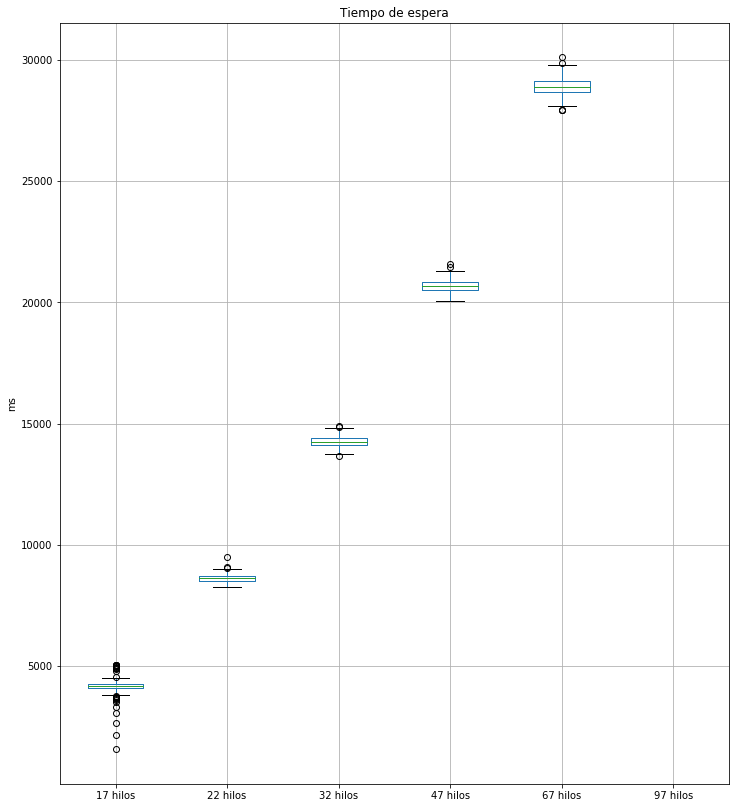

In [22]:
allDf = pd.concat(
    [df_1_elapsed, df_2_elapsed,
    df_3_elapsed, df_4_elapsed,
    df_5_elapsed, df_6_elapsed], axis = 1, keys=keys)
bplot = allDf.boxplot(column=keys, figsize=(12,14))
bplot.set_ylabel('ms')
bplot.set_title('Tiempo de espera')
plt.show()


Text(0, 0.5, 'tps')

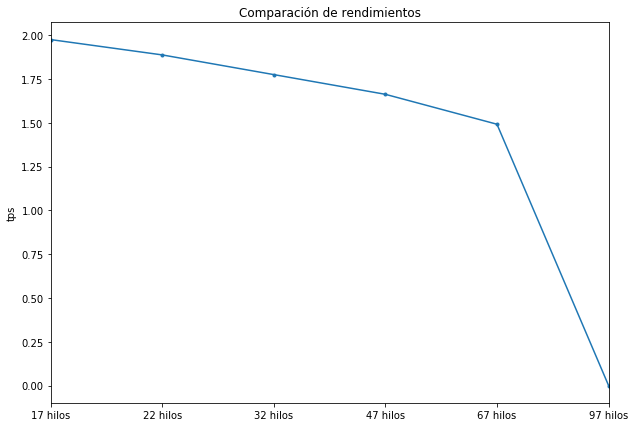

In [23]:
df_1_throughput = df.iloc[[0]].reset_index()['Throughput'];
df_2_throughput = df.iloc[[1]].reset_index()['Throughput'];
df_3_throughput = df.iloc[[2]].reset_index()['Throughput'];
df_4_throughput = df.iloc[[3]].reset_index()['Throughput'];
df_5_throughput = df.iloc[[4]].reset_index()['Throughput'];
df_6_throughput = df.iloc[[5]].reset_index()['Throughput'];

dfLines = pd.concat([df_1_throughput, df_2_throughput, df_3_throughput, df_4_throughput, df_5_throughput, df_6_throughput], axis=1)
dfLines.columns = keys
ax = df['Throughput'].plot(title = 'Comparación de rendimientos', style = '.-', figsize=(10, 7))
ax.set_ylabel("tps")

Text(0, 0.5, 'ms')

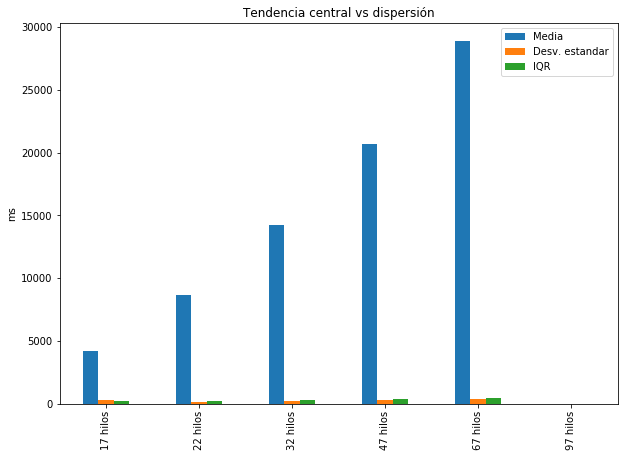

In [24]:
columns = ['Media', 'Desv. estandar', 'IQR']
dfBar = df[columns]
ax = dfBar.plot(title = 'Tendencia central vs dispersión', kind = 'bar', figsize=(10, 7))
ax.set_ylabel("ms")

Text(0, 0.5, 'ms')

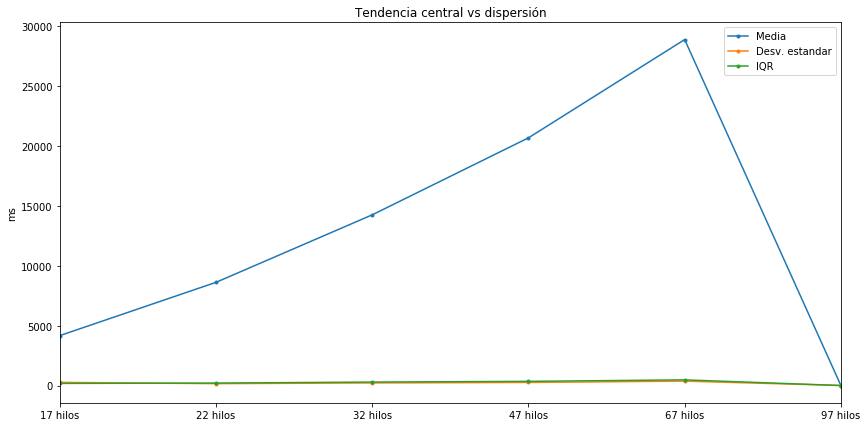

In [25]:
ax = dfBar.plot(title = 'Tendencia central vs dispersión', style = '.-', figsize=(14, 7))
ax.set_ylabel("ms")

Text(0, 0.5, '%')

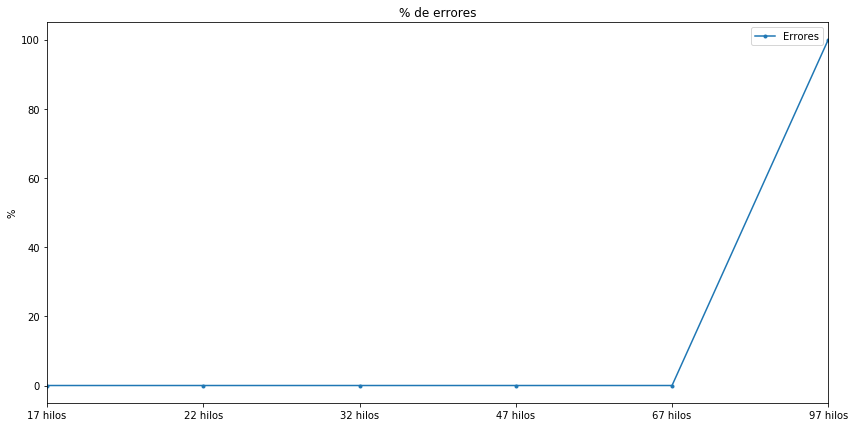

In [26]:
df_errors = {
    'Errores': [
        (df_1_error['elapsed'].count()/df_1['elapsed'].count())*100,
        (df_2_error['elapsed'].count()/df_2['elapsed'].count())*100,
        (df_3_error['elapsed'].count()/df_3['elapsed'].count())*100,
        (df_4_error['elapsed'].count()/df_4['elapsed'].count())*100,
        (df_5_error['elapsed'].count()/df_5['elapsed'].count())*100,
        (df_6_error['elapsed'].count()/df_6['elapsed'].count())*100
    ]
}
df_errors = pd.DataFrame(data=df_errors, index=keys)
ax = df_errors.plot(title = '% de errores', style = '.-', figsize=(14, 7))
ax.set_ylabel("%")



In [27]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [28]:
df_perf = pd.read_csv("./log_perfmon.csv")

firstTimestamp = df_perf.iloc[0]['timeStamp']
startupTime = (10*1000)
holdLoadTime = (120*1000)

startTime_1 = firstTimestamp + startupTime
endTime_1 = startTime_1 + holdLoadTime

startTime_2 = endTime_1 + startupTime
endTime_2 = startTime_2 + holdLoadTime

startTime_3 = endTime_2 + startupTime
endTime_3 = startTime_3 + holdLoadTime

startTime_4 = endTime_3 + startupTime
endTime_4 = startTime_4 + holdLoadTime

startTime_5 = endTime_4 + startupTime
endTime_5 = startTime_5 + holdLoadTime

startTime_6 = endTime_5 + startupTime
endTime_6 = startTime_6 + holdLoadTime


df_1_perf = df_perf[(df_perf['timeStamp']) > startTime_1]
df_1_perf = df_1_perf[(df_1_perf['timeStamp']) <= endTime_1]

df_2_perf = df_perf[(df_perf['timeStamp']) > startTime_2]
df_2_perf = df_2_perf[(df_2_perf['timeStamp']) <= endTime_2]

df_3_perf = df_perf[(df_perf['timeStamp']) > startTime_3]
df_3_perf = df_3_perf[(df_3_perf['timeStamp']) <= endTime_3]

df_4_perf = df_perf[(df_perf['timeStamp']) > startTime_4]
df_4_perf = df_4_perf[(df_4_perf['timeStamp']) <= endTime_4]

df_5_perf = df_perf[(df_perf['timeStamp']) > startTime_5]
df_5_perf = df_5_perf[(df_5_perf['timeStamp']) <= endTime_5]

df_6_perf = df_perf[(df_perf['timeStamp']) > startTime_6]
df_6_perf = df_6_perf[(df_6_perf['timeStamp']) <= endTime_6]


df_disk_1 = df_1_perf[df_1_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_1 = df_1_perf[df_1_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_1 = df_1_perf[df_1_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_1 = df_1_perf[df_1_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']

df_disk_2 = df_2_perf[df_2_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_2 = df_2_perf[df_2_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_2 = df_2_perf[df_2_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_2 = df_2_perf[df_2_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']


df_disk_3 = df_3_perf[df_3_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_3 = df_3_perf[df_3_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_3 = df_3_perf[df_3_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_3 = df_3_perf[df_3_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']


df_disk_4 = df_4_perf[df_4_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_4 = df_4_perf[df_4_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_4 = df_4_perf[df_4_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_4 = df_4_perf[df_4_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']


df_disk_5 = df_5_perf[df_5_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_5 = df_5_perf[df_5_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_5 = df_5_perf[df_5_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_5 = df_5_perf[df_5_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']


df_disk_6 = df_6_perf[df_6_perf['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
df_tcp_6 = df_6_perf[df_6_perf['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
df_mem_6 = df_6_perf[df_6_perf['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
df_cpu_6 = df_6_perf[df_6_perf['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']


In [29]:
def getPerfmonRow(data):
    disk = data[data['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
    tcp = data[data['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
    memory = data[data['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
    cpu = data[data['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']
    
    meanDisk = meanTcp = meanMemory = meanCpu = 0
    if (disk.count() > 0):
        meanDisk = disk.mean()
    if (tcp.count() > 0):
        meanTcp = tcp.mean() / 100
    if (memory.count() > 0):
        meanMemory = memory.mean() / 1000
    if (cpu.count() > 0):
        meanCpu = cpu.mean() / 1000
    
    return [meanCpu, meanMemory, meanTcp, meanDisk];

In [30]:
data = [
    getPerfmonRow(df_1_perf),
    getPerfmonRow(df_2_perf),
    getPerfmonRow(df_3_perf),
    getPerfmonRow(df_4_perf),
    getPerfmonRow(df_5_perf),
    getPerfmonRow(df_6_perf),
];

columns = ['CPU', 'Memory', 'Tcp', 'Disk']
  
df = pd.DataFrame(data, columns = columns, index = keys) 
  
df

CPU     Memory          Tcp       Disk
17 hilos  96.764825  27.964817   496.833333   0.233333
22 hilos  96.995917  29.196400  1041.666667   0.433333
32 hilos  96.834808  30.508667  1727.333333  59.500000
47 hilos  96.786342  32.278000  2510.833333   0.000000
67 hilos  96.731975  34.101192  3503.666667   0.000000
97 hilos  97.838025  35.884683  4444.416667   0.200000

In [31]:
fig = go.Figure()

columns = ['CPU', 'Memory', 'Disk']
dfRadar = df[columns]
dfRadar = dfRadar.rename(columns={
    'CPU': 'CPU (%) (' + str(round(df['CPU'].min(), 2)) + '-' + str(round(df['CPU'].max(), 2)) + ')',
    'Memory': 'Memory (%) (' + str(round(df['Memory'].min(), 2)) + ' - ' + str(round(df['Memory'].max(), 2)) + ')',
    'Disk': 'Disk (%) (' + str(round(df['Disk'].min(), 2)) + ' - ' + str(round(df['Disk'].max(), 2)) + ')',

})

for idx, x in enumerate(keys):
    fig.add_trace(
        go.Scatterpolar(
            r=dfRadar.loc[x].values.tolist() + dfRadar.loc[x].values.tolist()[:1],
            theta=dfRadar.columns.tolist() + dfRadar.columns.tolist()[:1],
            name=keys[idx],
            showlegend=True
            )
        )

fig.update_layout(
    polar=dict(
        radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),

    title="Comparación de descarga de html con imagen grande y pequeña"
)

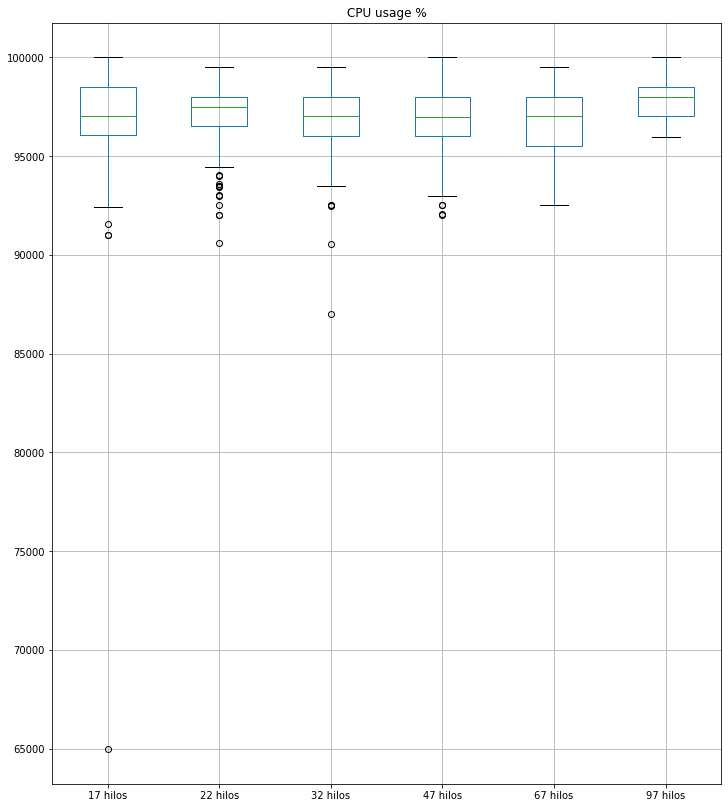

In [32]:
allDf = pd.concat([df_cpu_1, df_cpu_2, df_cpu_3, df_cpu_4, df_cpu_5, df_cpu_6], axis=1, keys=keys)
bplot = allDf.boxplot(
    column=keys,
    labels=keys,
    vert=True,
    figsize=(12,14)
)
plt.title('CPU usage %')

plt.show()

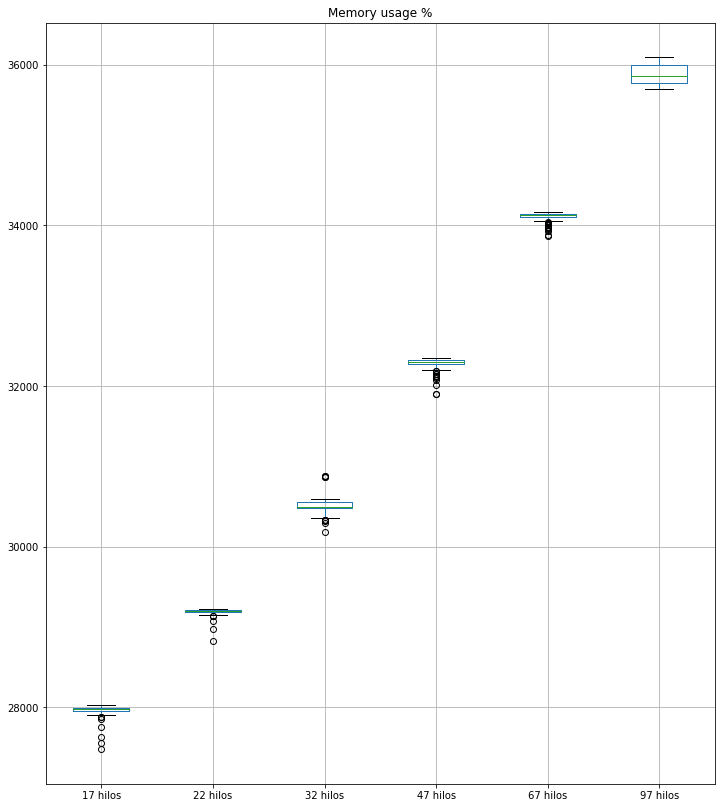

In [33]:
allDf = pd.concat([df_mem_1, df_mem_2, df_mem_3, df_mem_4, df_mem_5, df_mem_6], axis=1, keys=keys)
bplot = allDf.boxplot(
    column=keys,
    labels=keys,
    vert=True,
    figsize=(12,14)
)
plt.title('Memory usage %')

plt.show()

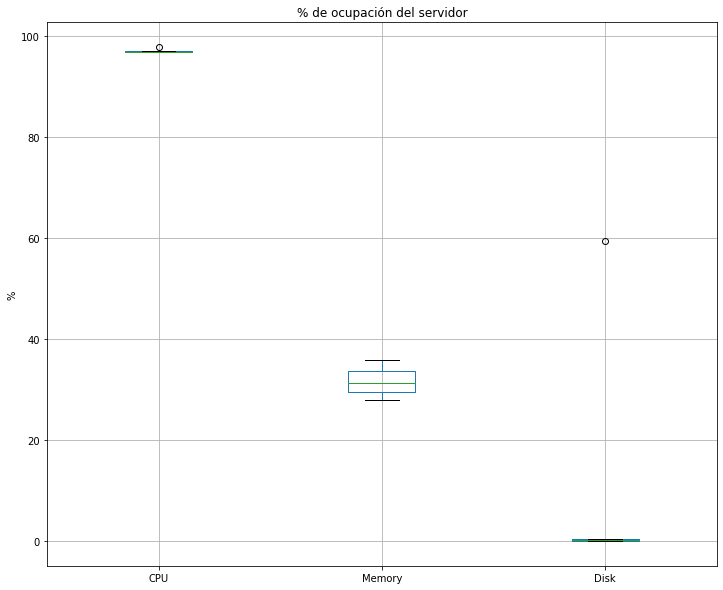

Text(0, 0.5, '%')

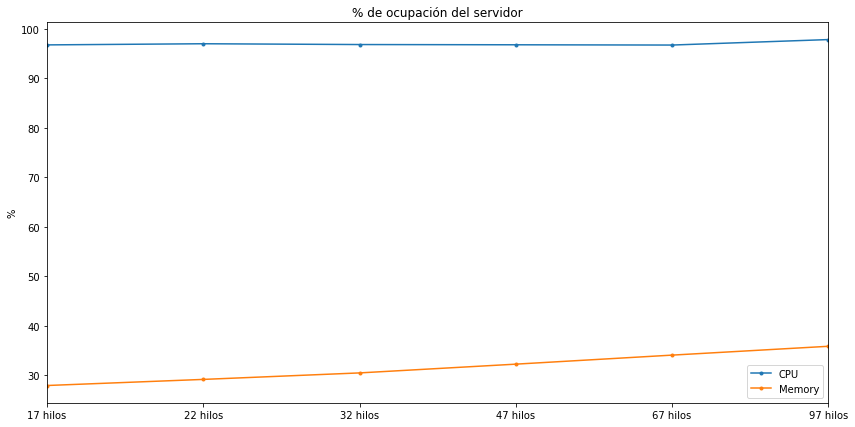

In [34]:
bplot = df.boxplot(
    column=['CPU', 'Memory', 'Disk'],
    labels=['CPU', 'Memory', 'Disk'],
    vert=True,
    figsize=(12,10)
)
bplot.set_ylabel('%')
plt.title('% de ocupación del servidor')
plt.show()

columns = ['CPU', 'Memory']
dfLines = df[columns]
ax = dfLines.plot(title = '% de ocupación del servidor', style = '.-', figsize=(14, 7))
ax.set_ylabel("%")